In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
netflix_titles_path = "Resources/cleaned_netflix_df.csv"

# Read the mouse data and the study results
netflix_ratings_df = pd.read_csv(netflix_titles_path)

# Define a dictionary structure for header row styling
df_header_row = {
    'selector': 'th.col_heading',
    'props': 'background-color: bisque;'
}

# Set the default size of the figure and the resolution to display the plots used later in the analysis
plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams['figure.dpi'] = 140

# Customize plotting attributes for Seaborn:
palette_color = sns.color_palette("deep")
sns.set_style("whitegrid")
color_map = plt.colormaps['RdBu']

# Drop the unwanted column in the dataframe
netflix_ratings_df = netflix_ratings_df.drop(columns=netflix_ratings_df.columns[0], inplace = False)

# Rename columns in the above dataframe for consistency
netflix_ratings_df = netflix_ratings_df.rename(columns={'type':'Media Type', 'country':'Country', 'date_added':'Date_Added', 'release_year':'Year_of_Release', 'rating':'Rating', 'listed_in':'Media_Category'})

# Remove rows that have minimal to no entries for ratings that cannot be mapped to specific target ages
ratings_filter_list = ['66 min', '74 min', '84 min']
netflix_ratings_df = netflix_ratings_df.drop(netflix_ratings_df[netflix_ratings_df['Rating'].isin(ratings_filter_list)].index)

# Display sample data - minor data wrangling for hiding the index
netflix_ratings_df.head().style.hide(axis="index").set_table_styles([df_header_row])

Media Type,Country,Date_Added,Year_of_Release,Rating,Media_Category
Movie,United States,"September 25, 2021",2020,PG-13,Documentaries
TV Show,South Africa,"September 24, 2021",2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
TV Show,India,"September 24, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, TV Comedies"
Movie,"United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia","September 24, 2021",1993,TV-MA,"Dramas, Independent Movies, International Movies"
TV Show,United Kingdom,"September 24, 2021",2021,TV-14,"British TV Shows, Reality TV"


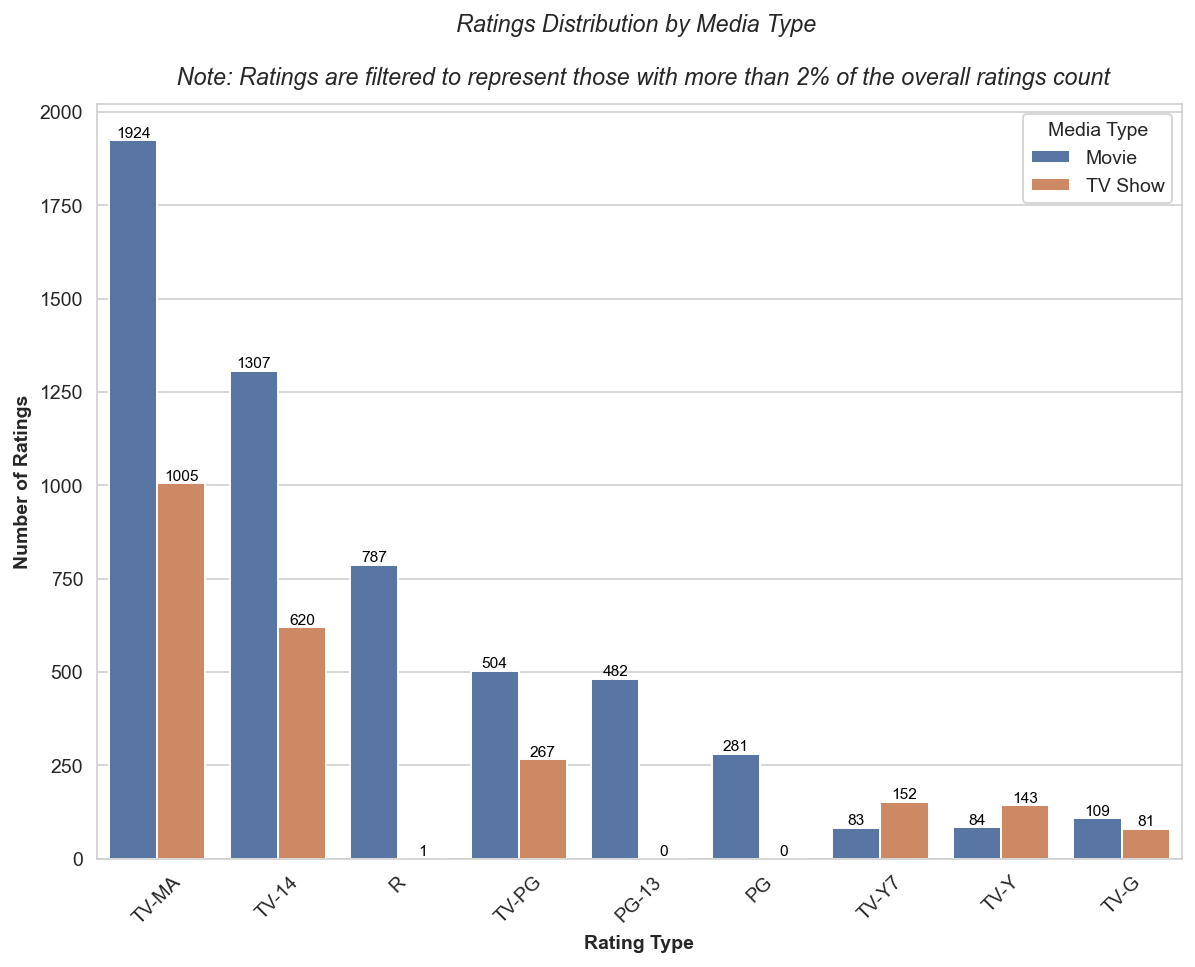

In [61]:
# Generate a count plot showing the total number of ratings for each media type (Movie/TV Show) using Pandas.

# Step 1: Filter the dataset to only include media types that have more than 2% of the total ratings volume
ratings_count = netflix_ratings_df['Rating'].value_counts(ascending = False)
ratings_count_filtered = ratings_count[ratings_count / ratings_count.sum() > 0.02]

# Step 2: Display the result in a count plot in DESC order based on the requirement and apply axis formating
ax = sns.countplot(x = 'Rating', hue = 'Media Type', data = netflix_ratings_df, order = ratings_count.iloc[0:len(ratings_count_filtered)].index, palette = palette_color)
plt.title('Ratings Distribution by Media Type \n\n Note: Ratings are filtered to represent those with more than 2% of the overall ratings count', fontstyle = 'italic', size=12, pad = 10)
plt.xlabel('Rating Type', fontweight = 'bold', size=10)
plt.ylabel('Number of Ratings', fontweight = 'bold', size=10)
plt.xticks(rotation = 45)

# Step 4: Annotate the bar labels to show the respective bar labels
# For each bar in the chart, add a text label.
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_text = round(bar.get_height())
  # This will give the middle of each bar on the x-axis.
  text_label_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_label_y = bar.get_y() + bar_text
  # Label each of the bars
  ax.text(text_label_x, text_label_y, bar_text, ha = 'center', va = 'bottom', color = 'k', size = 8)

# Step 3: Display the plot
plt.show()

In [62]:
# Data Preparation and wrangling for plotting the heatmap showing target population preferences

# Step 1: Let's retrieve just the first country for media types that have multiple country affiliations
netflix_ratings_df['First_Country'] = netflix_ratings_df['Country'].apply(lambda x: x.split(",")[0])

# Step 2: Create a dictionary to map the target ages of the audience against the media ratings
ratings_ages = {
            'TV-PG': 'Older Kids',
            'TV-MA': 'Adults',
            'TV-Y7-FV': 'Older Kids',
            'TV-Y7': 'Older Kids',
            'TV-14': 'Teens',
            'R': 'Adults',
            'TV-Y': 'Kids',
            'NR': 'Adults',
            'PG-13': 'Teens',
            'TV-G': 'Kids',
            'PG': 'Older Kids',
            'G': 'Kids',
            'UR': 'Adults',
            'NC-17': 'Adults'
              }

# Step 3: Replace the existing Rating column in the input dataframe with the above mapped series
netflix_ratings_df['Target_Ages'] = netflix_ratings_df['Rating'].replace(ratings_ages)

In [63]:
# Pre-processing steps to identify the specific attributes for a target audience distribution across countries

# Step 1: Initialize country level counter for processing
netflix_ratings_df['Country_Count'] = 1

# Step 2: Create a series for the Top 10 countries in terms of the media releases
country_data = netflix_ratings_df.groupby('First_Country')['Country_Count'].sum().sort_values(ascending=False).reset_index()[0:10]
country_data = country_data['First_Country']

# Step 3: Create a new dataframe for the heatmap
target_audience_heatmap = netflix_ratings_df.loc[netflix_ratings_df['First_Country'].isin(country_data)]

# Step 4: Use the Python 'Crosstab' function to normalize the distribution of media assets across Top 10 countries
target_audience_heatmap = pd.crosstab(target_audience_heatmap['First_Country'], target_audience_heatmap['Target_Ages'], normalize = "index").T

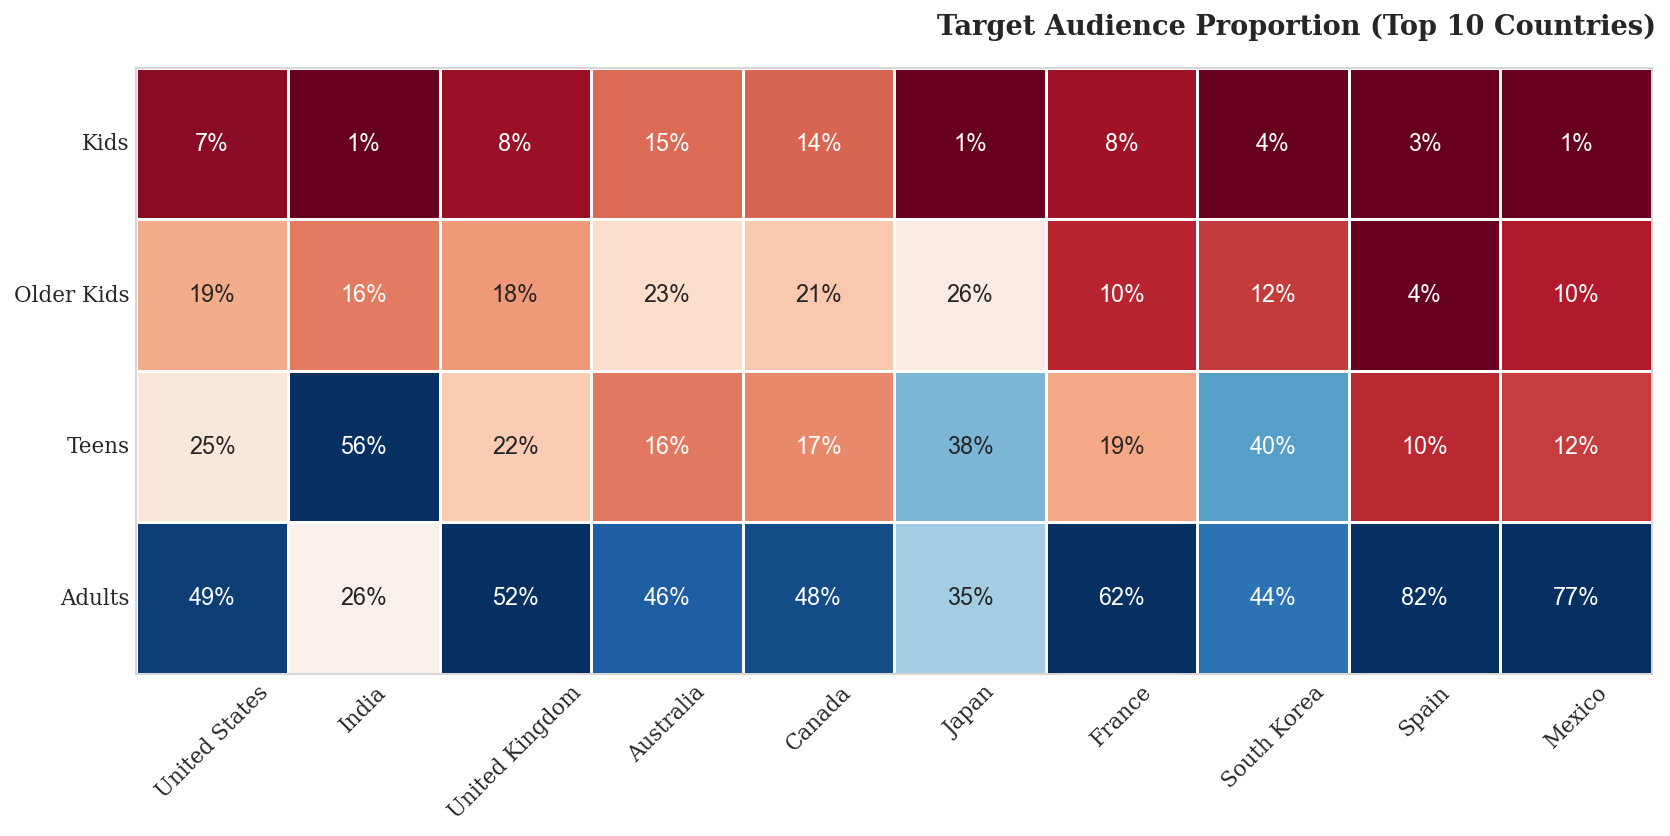

In [64]:
# Generate the actual heatmap based on the prior calculations and pre-processing steps for the datase

# Step 1: Create the target lists for each of the axes for the heatmaps for plotting
target_country_list = ['United States', 'India', 'United Kingdom', 'Australia', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
target_age_list = ['Kids','Older Kids','Teens','Adults']

# Step 2: Plot the heatmap based on the above lists and additional custom attributes
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(target_audience_heatmap.loc[target_age_list, target_country_list], cmap = color_map, square = True, linewidth = 1.5, cbar = False, annot = True, fmt = '1.0%', vmax = 0.5 , vmin = 0.05, ax = ax, annot_kws={"fontsize":12})

# Step 3: Apply additional customization to the heatmap
ax.spines[:].set_visible(True)
fig.text(0.99, 0.70, 'Target Audience Proportion (Top 10 Countries)', fontweight = 'bold', fontfamily = 'serif', fontsize = 14, ha ='right')
ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation = 45, fontsize=11)
ax.set_ylabel(''); ax.set_xlabel('')
ax.tick_params(axis = 'both', which = 'both', length = 0)
plt.tight_layout()

# Step 4: Display the heatmap
plt.show()